In [27]:
import pandas as pd
import numpy as np

In [28]:
reviews= pd.read_csv('reviews_cleaned.csv',index_col=0)
reviews.head()

,Experience_Summary,Overall_Rating,Customer_Name,Trip_Verified,Experience_Detail,Traveller_Type,Seat_Type,Flight_Route,Flight_Date,Seat_Comfort,...,Value_for_Money,Recommended,Food_and_Beverages,Inflight_Entertainment,WiFi_and_Connectivity,Airline_Name,Year_Flown,Month_Flown,Number_of_Stops,Trip_Type
0,This has been a total nightmare,1,V Darkana,1.0,My flight was scheduled on July 4 2021 Sunda...,Family Leisure,Economy Class,Anchorage to San Francisco,Jul-21,1.0,...,1.0,no,3.0,3.0,1.0,United Airlines,2021,July,0.0,International
1,beyond appalled by this experience,1,Bishop Jermaine Moore Sr.,0.0,United Airlines have successfully and repetit...,Family Leisure,Economy Class,Pittsburgh to Dubai via Newark,May-23,3.0,...,1.0,no,1.0,1.0,1.0,United Airlines,2023,May,1.0,International
2,Both segments were awful,1,J Parcell,1.0,Both segments were awful. The single agent f...,Solo Leisure,Economy Class,Montrose to Denver,Jul-21,2.0,...,1.0,no,1.0,1.0,1.0,United Airlines,2021,July,0.0,International
3,never fly through this airline again,1,S Laytan,1.0,We reviewed the dimensions and the sizes on ...,Family Leisure,Economy Class,Pasco to Miami,Jun-21,1.0,...,1.0,no,1.0,1.0,1.0,United Airlines,2021,June,0.0,International
4,fly other airlines in the future,1,Nancy S Giannetta,1.0,So as I boarded I ask for help putting my ca...,Solo Leisure,Business Class,Chicago to Tampa,Apr-24,2.0,...,1.0,no,2.0,2.0,1.0,United Airlines,2024,April,0.0,International


In [29]:
reviews['Experience_Detail'].iloc[0]

'  My flight was scheduled on July 4 2021 Sunday at 1:00am. We checked in and were at the gate and then we’re notified that it was delayed by an hour then 2 hours and then completely rescheduled to evening 5 pm That is 16 hours delay. After we check in for 5 pm we were notified every hour that it is again delayed. In total we were notified 8 different times the aircraft had a technical issue and was repaired and then brought to the gate. To our horror wrong aircraft was brought and we were delayed again. This has been a total nightmare we have at the airport for over 24 hours now. The food vouchers provided are not really accepted at at all food vendors.'

In [30]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.


In [31]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

In [32]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/kumarkalyanbudiredla/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [33]:
sent_analyzer=SentimentIntensityAnalyzer()

In [34]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kumarkalyanbudiredla/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kumarkalyanbudiredla/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [35]:
from nltk.tokenize import wordpunct_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kumarkalyanbudiredla/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:
stop_words=set(stopwords.words('English'))
stop_words.remove('not')

In [37]:
import re

In [38]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 're',
 's'

I don't want to remove the not so from stop words i am removing not and n't words, so that we can catch the exact sentiment of the sentence.

In [39]:
stop_words_filter=[]
for word in stop_words:
    if word.endswith("n't"):
        continue
    else:
        #print(i)
        stop_words_filter.append(word)

In [40]:
len(stop_words_filter)

160

In [41]:
stop_words_filter

['m',
 'their',
 'more',
 "it's",
 'that',
 'her',
 'into',
 'why',
 'or',
 'couldn',
 'does',
 'yours',
 'again',
 'mightn',
 'to',
 'with',
 'than',
 'needn',
 'are',
 'do',
 'but',
 'hadn',
 'isn',
 'y',
 "that'll",
 's',
 'what',
 'being',
 'only',
 "you'll",
 'his',
 'himself',
 'those',
 'which',
 'too',
 'won',
 'over',
 'here',
 'both',
 'didn',
 'wouldn',
 'it',
 'of',
 'he',
 "should've",
 'ain',
 'ours',
 'itself',
 'once',
 'as',
 'while',
 'ma',
 'themselves',
 'the',
 'aren',
 've',
 'how',
 'a',
 'they',
 'so',
 'been',
 'will',
 'few',
 'don',
 'should',
 'further',
 'there',
 'each',
 'i',
 'shouldn',
 'my',
 'below',
 'such',
 'doesn',
 "you'd",
 'has',
 'because',
 'very',
 'she',
 'haven',
 'before',
 "you're",
 'yourself',
 'him',
 'yourselves',
 'had',
 'out',
 'nor',
 'until',
 'and',
 'against',
 'theirs',
 'all',
 'be',
 'for',
 're',
 'other',
 'now',
 'd',
 'herself',
 'above',
 'some',
 't',
 'in',
 'have',
 'its',
 'an',
 'from',
 'own',
 'no',
 'when',
 'w

In [42]:
len(stop_words)

178

In [43]:
def preprocess(text):
    wt= word_tokenize(text)
    lm= WordNetLemmatizer()
    filtered_text=[]
    for each in wt:
        lemm_word=lm.lemmatize(each)
        if lemm_word in stop_words_filter:
            continue
        else:
            filtered_text.append(each)
    return ' '.join(filtered_text)

In [44]:
preprocess("Romeo and Julie aren't leaving each other")

"Romeo Julie n't leaving"

To find out the optimal value for negative and positives

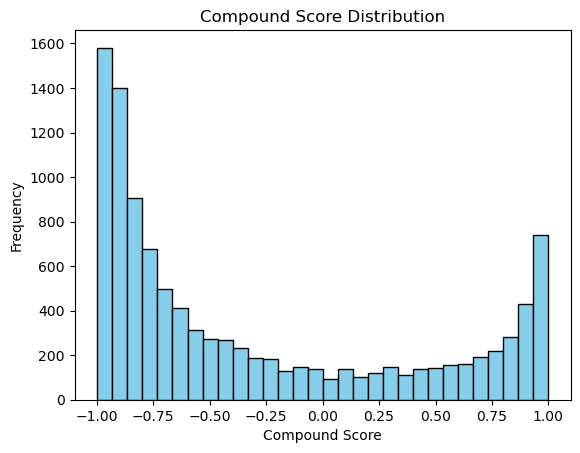

In [45]:

import matplotlib.pyplot as plt


# Apply sentiment analysis to get compound scores
reviews['compound'] = reviews['Experience_Detail'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Visualize the distribution of compound scores
plt.hist(reviews['compound'], bins=30, color='skyblue', edgecolor='black')
plt.title("Compound Score Distribution")
plt.xlabel("Compound Score")
plt.ylabel("Frequency")
plt.show()

From the graph above we can see that we can capture most of negative reviews if we set threshold as -0.25 or -0.3 and similarly for positive we can set 0.3.

In [46]:
reviews.head()

,Experience_Summary,Overall_Rating,Customer_Name,Trip_Verified,Experience_Detail,Traveller_Type,Seat_Type,Flight_Route,Flight_Date,Seat_Comfort,...,Recommended,Food_and_Beverages,Inflight_Entertainment,WiFi_and_Connectivity,Airline_Name,Year_Flown,Month_Flown,Number_of_Stops,Trip_Type,compound
0,This has been a total nightmare,1,V Darkana,1.0,My flight was scheduled on July 4 2021 Sunda...,Family Leisure,Economy Class,Anchorage to San Francisco,Jul-21,1.0,...,no,3.0,3.0,1.0,United Airlines,2021,July,0.0,International,-0.9304
1,beyond appalled by this experience,1,Bishop Jermaine Moore Sr.,0.0,United Airlines have successfully and repetit...,Family Leisure,Economy Class,Pittsburgh to Dubai via Newark,May-23,3.0,...,no,1.0,1.0,1.0,United Airlines,2023,May,1.0,International,-0.9012
2,Both segments were awful,1,J Parcell,1.0,Both segments were awful. The single agent f...,Solo Leisure,Economy Class,Montrose to Denver,Jul-21,2.0,...,no,1.0,1.0,1.0,United Airlines,2021,July,0.0,International,-0.8451
3,never fly through this airline again,1,S Laytan,1.0,We reviewed the dimensions and the sizes on ...,Family Leisure,Economy Class,Pasco to Miami,Jun-21,1.0,...,no,1.0,1.0,1.0,United Airlines,2021,June,0.0,International,0.5983
4,fly other airlines in the future,1,Nancy S Giannetta,1.0,So as I boarded I ask for help putting my ca...,Solo Leisure,Business Class,Chicago to Tampa,Apr-24,2.0,...,no,2.0,2.0,1.0,United Airlines,2024,April,0.0,International,0.9482


In [53]:
def sentiment_score(text):
    text= preprocess(text)
    score= sent_analyzer.polarity_scores(text)
    if score['compound'] >=0.3:
        return 'positive'
    elif score['compound'] <=-0.2:
        return 'negative'
    else:
        return 'neutral'

In [54]:
sentiment_score("Romeo Julie n't leaving")

'neutral'

In [55]:
reviews['sentiment']=reviews['Experience_Detail'].apply(sentiment_score)

In [56]:
reviews.head()

,Experience_Summary,Overall_Rating,Customer_Name,Trip_Verified,Experience_Detail,Traveller_Type,Seat_Type,Flight_Route,Flight_Date,Seat_Comfort,...,Food_and_Beverages,Inflight_Entertainment,WiFi_and_Connectivity,Airline_Name,Year_Flown,Month_Flown,Number_of_Stops,Trip_Type,compound,sentiment
0,This has been a total nightmare,1,V Darkana,1.0,My flight was scheduled on July 4 2021 Sunda...,Family Leisure,Economy Class,Anchorage to San Francisco,Jul-21,1.0,...,3.0,3.0,1.0,United Airlines,2021,July,0.0,International,-0.9304,negative
1,beyond appalled by this experience,1,Bishop Jermaine Moore Sr.,0.0,United Airlines have successfully and repetit...,Family Leisure,Economy Class,Pittsburgh to Dubai via Newark,May-23,3.0,...,1.0,1.0,1.0,United Airlines,2023,May,1.0,International,-0.9012,negative
2,Both segments were awful,1,J Parcell,1.0,Both segments were awful. The single agent f...,Solo Leisure,Economy Class,Montrose to Denver,Jul-21,2.0,...,1.0,1.0,1.0,United Airlines,2021,July,0.0,International,-0.8451,negative
3,never fly through this airline again,1,S Laytan,1.0,We reviewed the dimensions and the sizes on ...,Family Leisure,Economy Class,Pasco to Miami,Jun-21,1.0,...,1.0,1.0,1.0,United Airlines,2021,June,0.0,International,0.5983,positive
4,fly other airlines in the future,1,Nancy S Giannetta,1.0,So as I boarded I ask for help putting my ca...,Solo Leisure,Business Class,Chicago to Tampa,Apr-24,2.0,...,2.0,2.0,1.0,United Airlines,2024,April,0.0,International,0.9482,positive


In [57]:
reviews['sentiment'].value_counts()

sentiment
negative    6433
positive    2981
neutral     1095
Name: count, dtype: int64

In [58]:
reviews.columns

Index(['Experience_Summary', 'Overall_Rating', 'Customer_Name',
       'Trip_Verified', 'Experience_Detail', 'Traveller_Type', 'Seat_Type',
       'Flight_Route', 'Flight_Date', 'Seat_Comfort', 'Cabin_Staff_Service',
       'Ground_Service', 'Value_for_Money', 'Recommended',
       'Food_and_Beverages', 'Inflight_Entertainment', 'WiFi_and_Connectivity',
       'Airline_Name', 'Year_Flown', 'Month_Flown', 'Number_of_Stops',
       'Trip_Type', 'compound', 'sentiment'],
      dtype='object')

In [59]:
reviews.rename(columns={'sentiment':'vader_sentiment'},inplace=True)

In [61]:
reviews.drop(columns=['compound'],axis=1,inplace=True)

In [62]:
reviews.columns

Index(['Experience_Summary', 'Overall_Rating', 'Customer_Name',
       'Trip_Verified', 'Experience_Detail', 'Traveller_Type', 'Seat_Type',
       'Flight_Route', 'Flight_Date', 'Seat_Comfort', 'Cabin_Staff_Service',
       'Ground_Service', 'Value_for_Money', 'Recommended',
       'Food_and_Beverages', 'Inflight_Entertainment', 'WiFi_and_Connectivity',
       'Airline_Name', 'Year_Flown', 'Month_Flown', 'Number_of_Stops',
       'Trip_Type', 'vader_sentiment'],
      dtype='object')

We also did roberta sentiment merge that column with this data

In [64]:
reviews_roberta= pd.read_csv('reviews_with_sentiments.csv',usecols=['roberta_sentiment'])
reviews_roberta.head()

,roberta_sentiment
0,Negative
1,Negative
2,Negative
3,Neutral
4,Neutral


In [65]:
review_sentiments=pd.concat([reviews,reviews_roberta],axis=1)

In [66]:
review_sentiments.head()

,Experience_Summary,Overall_Rating,Customer_Name,Trip_Verified,Experience_Detail,Traveller_Type,Seat_Type,Flight_Route,Flight_Date,Seat_Comfort,...,Food_and_Beverages,Inflight_Entertainment,WiFi_and_Connectivity,Airline_Name,Year_Flown,Month_Flown,Number_of_Stops,Trip_Type,vader_sentiment,roberta_sentiment
0,This has been a total nightmare,1,V Darkana,1.0,My flight was scheduled on July 4 2021 Sunda...,Family Leisure,Economy Class,Anchorage to San Francisco,Jul-21,1.0,...,3.0,3.0,1.0,United Airlines,2021,July,0.0,International,negative,Negative
1,beyond appalled by this experience,1,Bishop Jermaine Moore Sr.,0.0,United Airlines have successfully and repetit...,Family Leisure,Economy Class,Pittsburgh to Dubai via Newark,May-23,3.0,...,1.0,1.0,1.0,United Airlines,2023,May,1.0,International,negative,Negative
2,Both segments were awful,1,J Parcell,1.0,Both segments were awful. The single agent f...,Solo Leisure,Economy Class,Montrose to Denver,Jul-21,2.0,...,1.0,1.0,1.0,United Airlines,2021,July,0.0,International,negative,Negative
3,never fly through this airline again,1,S Laytan,1.0,We reviewed the dimensions and the sizes on ...,Family Leisure,Economy Class,Pasco to Miami,Jun-21,1.0,...,1.0,1.0,1.0,United Airlines,2021,June,0.0,International,positive,Neutral
4,fly other airlines in the future,1,Nancy S Giannetta,1.0,So as I boarded I ask for help putting my ca...,Solo Leisure,Business Class,Chicago to Tampa,Apr-24,2.0,...,2.0,2.0,1.0,United Airlines,2024,April,0.0,International,positive,Neutral


In [67]:
review_sentiments.to_csv('reviews_sentiment_analysis.csv')